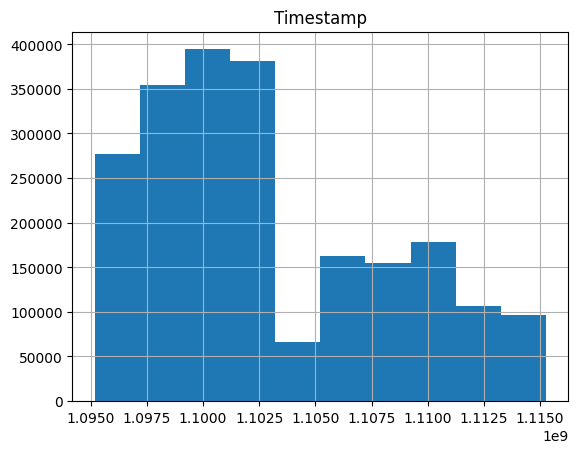

average time step: 9.237175690247684 seconds


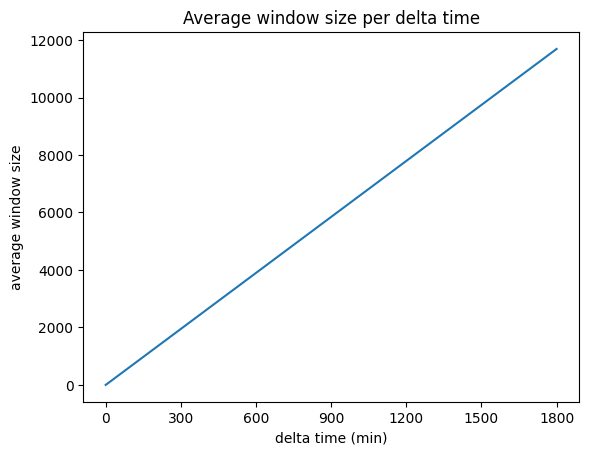

In [2]:
import pandas as pd
import utils
import matplotlib.pyplot as plt
import numpy as np

G, edges = utils.read_time_stamped_csv("data/reality-mining.csv", is_directed=False)

timestamps = [timestamp for _, _, timestamp in edges]
df = pd.DataFrame(timestamps)
df.hist("Timestamp")
df["T"] = df["Timestamp"].diff()
plt.show()

print(f"average time step: {df["T"].mean()} seconds")

plt.plot(
    range(0, 30 * 60 + 1, 5 * 60),
    [(t * 60) / (df["T"].mean()) for t in range(0, 30 * 60 + 1, 5 * 60)],
)
plt.xlabel("delta time (min)")
plt.xticks(range(0, 30 * 60 + 1, 5 * 60))
plt.ylabel("average window size")
plt.title("Average window size per delta time")
plt.show()

diffs = list(df["T"])
dt = 30 * 60  # 30 minutes
dts = range(
    0,
)
win_sizes = []
for i, val in enumerate(diffs):
    cumm = 0
    for j in range(i + 1, len(diffs)):
        cumm += diffs[j]
        if cumm > dt:
            win_sizes.append(j - i)
            break

In [4]:
from matplotlib import pyplot as plt
import numpy as np

df = pd.DataFrame([{"win_size": winsize} for winsize in win_sizes])
df.plot("win_size")
plt.title(
    f"Distribution of Window Sizes for delta_time=30. The \nmean is {np.array(win_sizes).mean(): 0.4f}"
)
plt.show()

TypeError: no numeric data to plot

In [ ]:
import time

begin = time.process_time()
edge_sources = []
for s, _, _ in edges:
    if s == "a":
        edge_sources.append(s)

end = time.process_time()
print(
    f"Iterating through array takes {end - begin: 0.4f}s, so paco should take around {(end - begin) * np.array(win_sizes).mean(): 0.4f}s"
)

Iterating through array takes  0.1088s, so paco should take around  97.3036s
